# Knowing the City- South Pasadena Through Python Programming

Download 'HISTORICAL POPULATION' data and list of employers table from WIKIPEDIA 

In [2]:
!conda install -c conda-forge geopy --yes 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install bs4
from bs4 import BeautifulSoup

!pip install html5lib
import html5lib

!pip install lxml
import lxml

print('Libraries imported.')

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.10.14-0, anaconda/win-64::openssl-1.1.1h-he774522_0
  - anaconda/win-64::ca-certificates-2020.10.14-0, defaults/win-64::openssl-1.1.1h-he774522_0
  - anaconda/win-64::openssl-1.1.1h-he774522_0, defaults/win-64::ca-certificates-2020.10.14-0
  - defaults/win-64::ca-certificates-2020.10.14-0, defaults/win-64::openssl-1.1.1h-he774522_0done

# All requested packages already installed.



usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


In [3]:
df=pd.read_csv("D:/Datasets/SouthPass.csv",encoding='mac-roman')
df

,Census,Pop.,Percent
0,1890,623.0,NaN
1,1900,1001.0,60.7
2,1910,4649.0,364.4
3,1920,7652.0,64.6
4,1930,13730.0,79.4
5,1940,14356.0,4.6
6,1950,16935.0,18.0
7,1960,19706.0,16.4
8,1970,22979.0,16.6
9,1980,22681.0,-1.3


In [4]:
format_dict = {'Mes':'{:%m-%Y}'} #Simplified format dictionary with values that do make sense for our data
df.style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Census,Pop.,Percent
0,1890,623.000000,nan
1,1900,1001.000000,60.700000
2,1910,4649.000000,364.400000
3,1920,7652.000000,64.600000
4,1930,13730.000000,79.400000
5,1940,14356.000000,4.600000
6,1950,16935.000000,18.000000
7,1960,19706.000000,16.400000
8,1970,22979.000000,16.600000
9,1980,22681.000000,-1.300000


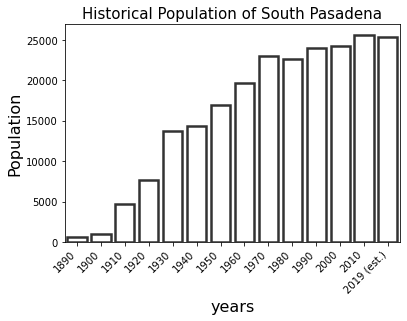

<Figure size 1800x1080 with 0 Axes>

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
ax1 = sns.barplot(x="Census", y="Pop.", data=df,
                 linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Historical Population of South Pasadena', fontsize=15)
plt.xlabel("years", fontsize=16)
plt.ylabel ("Population", fontsize=16)
#plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(25,15))
plt.show()

In [6]:
source = requests.get("https://en.wikipedia.org/wiki/South_Pasadena,_California").text 
soup = BeautifulSoup(source, "html.parser")

table = soup.find("table",{'class':"wikitable"})
# Dataframe with 3 columns

df1 = pd.read_html(str(table))
df1 = pd.DataFrame(df1[0])
df1

,#,Employer,# of Employees
0,1,Ralphs Grocery Co. #21,91
1,2,The Vons Companies Inc. Pavilions #2228,88
2,3,Trader Joe's No. 18,82
3,4,Bristol Farms,81
4,5,"WNC Insurance Services, Inc.",74
5,6,TLC Veterinary Centers Inc.,71
6,7,Stargate Films Inc.,65
7,8,"Collins, Collins, Muir & Stewart, LLP",65
8,9,Orchard Supply Hardware,63
9,10,The Vons Companies Inc. #3075,62


According to the city's 2015–2016 Comprehensive Annual Financial Report, the top employers in the city are shown below: 

<ipython-input-7-fc7aec6cd356>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


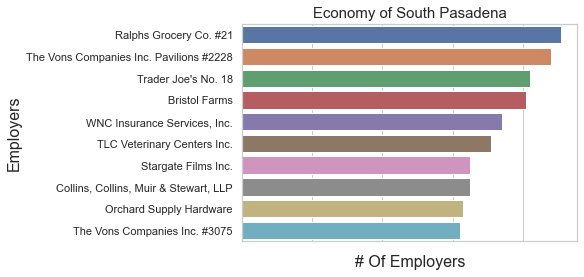

<Figure size 1800x1080 with 0 Axes>

In [7]:
g=sns.set_theme(style="whitegrid")

g=sns.barplot(x= '# of Employees', y = 'Employer', data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Economy of South Pasadena', fontsize=15)
plt.xlabel("# Of Employers", fontsize=16)
plt.ylabel ("Employers", fontsize=16)
#plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(25,15))
plt.show()

In [10]:
data=pd.read_csv("D:/Datasets/climate_southPass.csv")
data

,Months,Avg. Temperature,Min. Temperature,Max. Temperature,Precipitation / Rainfall (mm)
0,January,55.2,43.3,67.3,98
1,February,57.4,45.5,69.3,99
2,March,58.1,46.8,69.6,82
3,April,61.5,49.6,73.4,31
4,May,64.8,53.8,75.9,7
5,June,69.3,57.6,81.1,2
6,July,74.5,61.5,87.6,0
7,August,75.4,62.4,88.3,4
8,September,73.0,60.3,86.0,10
9,October,68.0,55.2,80.8,11


In [11]:
data.describe()

,Avg. Temperature,Min. Temperature,Max. Temperature,Precipitation / Rainfall (mm)
count,12.000000,12.000000,12.000000,12.000000
mean,64.450000,52.291667,76.691667,37.750000
std,7.420916,7.071770,7.807160,38.447426
min,55.200000,43.300000,67.300000,0.000000
25%,57.925000,46.475000,69.525000,6.250000
50%,63.150000,51.700000,74.650000,21.000000
75%,70.225000,58.275000,82.325000,64.750000
max,75.400000,62.400000,88.300000,99.000000


Temperature taken in Farenhiet

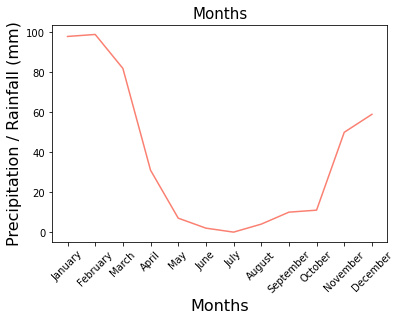

<Figure size 1800x1080 with 0 Axes>

In [5]:
h=sns.lineplot(data=data,x='Months',y='Precipitation / Rainfall (mm)',color="salmon")
#h.set_xticklabels(h.get_xticklabels(), rotation=45, horizontalalignment='right' )
#h.set_xticklabels(rotation=30)
plt.title('Months', fontsize=15)
plt.xlabel("Months", fontsize=16)
plt.ylabel ("Precipitation / Rainfall (mm)", fontsize=16)
plt.xticks(rotation=45)
#plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(25,15))
plt.show()

References: 
    
    * https://en.climate-data.org/north-america/united-states-of-america/california/south-pasadena-871547/

For the month of August, below is the trend of climate

[Text(0, 0, 'Avg. Temperature '),
 Text(1, 0, 'Min. Temperature '),
 Text(2, 0, 'Max. Temperature '),
 Text(3, 0, 'Precipitation / Rainfall (mm)')]

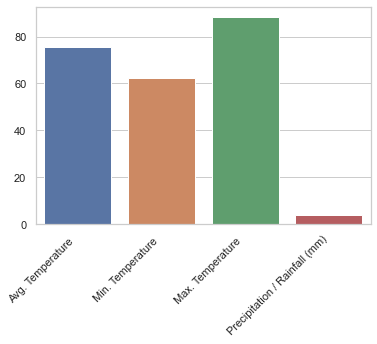

In [9]:
q_data = data.query("Months == 'August'")
ax2=sns.barplot(data=q_data)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')


School Districts enrollment By group : https://www.neighborhoodscout.com/ca/south-pasadena/schools

In [10]:
df1=pd.read_csv("D:\Datasets\costoflivingSpas.csv",encoding='mac-roman')

In [11]:
df1

,COST OF LIVING,South Pasadena,California,USA,Unnamed: 4,Unnamed: 5
0,Overall,241.1,149.9,100,NaN,NaN
1,Grocery,108.6,105.1,100,NaN,NaN
2,Health,89.4,92.4,100,NaN,NaN
3,Housing,520.5,239.1,100,NaN,NaN
4,Median Home Cost,1203300.0,552800.0,231200,NaN,t
5,Utilities,98.8,102.4,100,NaN,NaN
6,Transportation,159.2,133.1,100,NaN,NaN
7,Miscellaneous,104.6,103.7,100,NaN,NaN


In [12]:
df2=df1.drop(columns='Unnamed: 4')

In [13]:
colspa=df2.drop(columns='Unnamed: 5')

In [14]:
colspa

,COST OF LIVING,South Pasadena,California,USA
0,Overall,241.1,149.9,100
1,Grocery,108.6,105.1,100
2,Health,89.4,92.4,100
3,Housing,520.5,239.1,100
4,Median Home Cost,1203300.0,552800.0,231200
5,Utilities,98.8,102.4,100
6,Transportation,159.2,133.1,100
7,Miscellaneous,104.6,103.7,100


In [15]:
spas_data=colspa.drop(index=4)


In [16]:
spas_data.set_index('COST OF LIVING')

,South Pasadena,California,USA
COST OF LIVING,,,
Overall,241.1,149.9,100
Grocery,108.6,105.1,100
Health,89.4,92.4,100
Housing,520.5,239.1,100
Utilities,98.8,102.4,100
Transportation,159.2,133.1,100
Miscellaneous,104.6,103.7,100


In [17]:
#import geopandas

In [18]:
#from geopandas import GeoDataFrame

#spas_df= GeoDataFrame(spas_data)

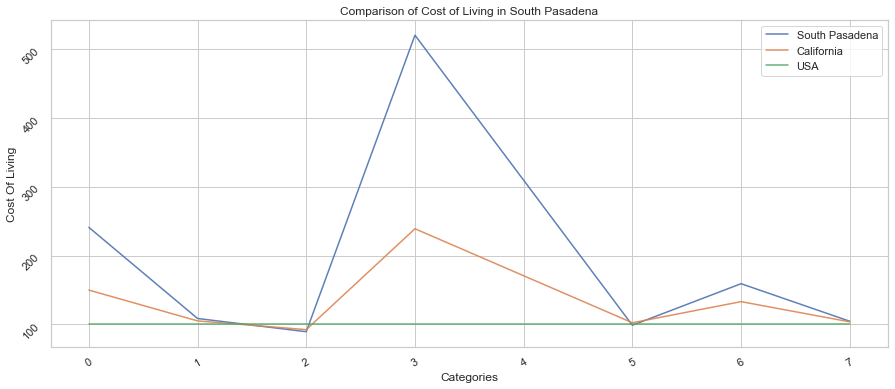

In [36]:
spas_data.plot(kind='line',
            alpha=0.90,
            stacked=False,
            figsize=(15,6))
plt.title('Comparison of Cost of Living in South Pasadena')
plt.xlabel('Categories')
plt.ylabel('Cost Of Living')
plt.yticks(rotation=45)
plt.xticks(rotation =30)
#plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Geopy for the map of South Pasadena 

In [20]:
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors
import geopy
from geopy.geocoders import Nominatim 

In [21]:
locator= Nominatim(user_agent='The Flash')
geopy.geocoders.options.default_user_agent='The Flash'
geolocator=Nominatim()

In [22]:
city='South Pasadena'
Zip='91030'
state='California'
country='United States'
locate=geolocator.geocode(city+','+Zip+','+state+','+country)
latitude=locate.latitude
longitude=locate.longitude
print("latitude is :", latitude,"\nlongitude is : ",longitude)

latitude is : 34.1133062 
longitude is :  -118.1478291


In [23]:
location = geolocator.geocode("South Pasadena, California")
print(location.address)


South Pasadena, Los Angeles County, California, 91030, United States


In [24]:
from branca.element import Figure
fig=Figure(width=550,height=350)
m1=folium.Map(width=550,height=350,location=[34.1133062, -118.1478291],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m1)
m1

# Using Foursquare API for finding Geographic details of  South Pasadena 

In [25]:
CLIENT_ID='0BPX23VUCSLSEZUIXIG0LCUCP3EGY5WR3XUNYSDVC0S44UVC' # your Foursquare ID
CLIENT_SECRET='EGX1JRYRZA1JQGXTTJFSKMKDDI5XPI4VEYUJUVXYF0ECOQAE' # your Foursquare Secret
VERSION='20180604'
LIMIT=60
Radius=300

In [26]:
# defining Url 

LIMIT = 60 # limit of number of venues returned by Foursquare API

radius = 300 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0BPX23VUCSLSEZUIXIG0LCUCP3EGY5WR3XUNYSDVC0S44UVC&client_secret=EGX1JRYRZA1JQGXTTJFSKMKDDI5XPI4VEYUJUVXYF0ECOQAE&v=20180604&ll=34.1133062,-118.1478291&radius=300&limit=60'

In [39]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6007776c69387b0b1f73f3b7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'South Pasadena',
  'headerFullLocation': 'South Pasadena',
  'headerLocationGranularity': 'city',
  'totalResults': 16,
  'suggestedBounds': {'ne': {'lat': 34.1160062027, 'lng': -118.14457404084749},
   'sw': {'lat': 34.110606197299994, 'lng': -118.1510841591525}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51db2cd0498e4b6d4e91c16b',
       'name': 'Cookies & Cream',
       'location': {'address': '1010 1/2 Fair Oaks Ave',
        'crossStreet': 'Oxley',
        'lat': 34.114147,
        'lng': -118.15018,
        'labeledLatL

In [40]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [41]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

<ipython-input-41-4243e3e1ab9c>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Cookies & Cream,Dessert Shop,34.114147,-118.150180
1,Blaze Pizza,Pizza Place,34.113624,-118.150113
2,Penguin's Frozen Yogurt,Frozen Yogurt Shop,34.113639,-118.151019
3,Massage Envy - South Pasadena,Spa,34.112522,-118.150133
4,Starbucks,Coffee Shop,34.114746,-118.150132
5,Panda Express - South Pasadena,Chinese Restaurant,34.111462,-118.150159
6,Poke Salad Bar,Poke Place,34.113474,-118.150249
7,Union Bakery,Bakery,34.112461,-118.150223
8,Jamba Juice,Juice Bar,34.113607,-118.150598
9,U.S. Bank ATM,ATM,34.112519,-118.150929


In [44]:
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[34.1133062, -118.1478291],tiles='cartodbpositron',zoom_start=16)
fig3.add_child(m3)

#Adding markers to the map
folium.Marker(location=[34.114147,-118.150180],popup='Default popup Marker1',tooltip='Cookies & Cream').add_to(m3)
folium.Marker(location=[34.113624,-118.150113],popup='<strong>Marker3</strong>',tooltip='<strong>Blaze Pizza</strong>').add_to(m3)
folium.Marker(location=[34.112522,-118.150133],popup='<h3 style="color:green;">Starbucks</h3>',tooltip='<strong>Massage Envy - South Pasadena</strong>').add_to(m3)
folium.Marker(location=[34.113639,-118.151019],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Penguins Frozen Yogurt</strong>').add_to(m3)
folium.Marker(location=[34.114746,-118.150132],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Starbucks</strong>').add_to(m3)

m3

In [43]:
map_Spas1 = folium.Map(location=[latitude, longitude], zoom_start=17.5,tiles='OpenStreetMap')
for lat, lon, poi, cluster in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'],nearby_venues['categories'] ):
    label = folium.Popup( str(cluster))
    folium.Marker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_Spas1)
       
map_Spas1

In [ ]:
spas_cc=pd.read_csv('D:/Datasets/Spas_Covidcases.csv')

In [ ]:
codec install basemap
